# Monte Carlo Simulation of a Financial Asset's Price

In this code work, I have tried to incorporate the use of stochastic mathematics to forecast the prices of Polygon cryptocurrency (ticker = MATIC-USD) for a period of 6 months using the data from 12 May 2021 to 12 November 2021. 

This simulation is based on the assumption that the prices of cryptocurrencies (also stocks) show Standard Brownian Motion. The motion can be expressed in form of an equation:

$$
dS_t = S_t \, \mu \, dt + S_t \, \sigma \, dW_t
$$

where

$$
dW_t = \epsilon \sqrt{dt}
$$

is a component of the equation that shows randomness. If we are considering a small time interval $ \Delta t $ , then the equation becomes:

$$
\Delta S_t = S_t \, \mu \, \Delta t + S_t \, \sigma \, \Delta W_t
$$

If we divide the equation by $ S_t $, then:

$$
\frac{\Delta S_t}{S_t}  = \, \mu \, \Delta t + \, \sigma \, \Delta W_t
$$



## For practical purposes

We need to calculate two things, Drift and Volatility.

Drift is represented by the equation:
$$
Drift = \mu \, - \frac{1}{2}\sigma^ 2
$$

Volatility is a random component and Python is used to generate that randomness. It is represented by:

$$
Volatility = \sigma * Z(Rand(0;1))
$$
where Z is a random number that follows the Normal distribution and lies between 0 and 1. It is also known as Z-Score in statistics.

By knowing these particulars, we can estimate the price of tomorrow based on today's price of the asset:
$$
P_{t+1} = P_t * e^{(\mu \, - \frac{1}{2}\sigma^ 2) + \sigma * Z(Rand(0;1))}
$$

This process is repeated for n number of times, depending upon the number of days we need to forecast.

### Note: 
### $ e^{(\mu \, - \frac{1}{2}\sigma^ 2) + \sigma * Z(Rand(0;1))} $
is the daily returns that we will be forecasting. This is identical to the continuous compounding concept.

$ V_n = V_0 (e^\theta)^n $ where $ V_0 $ is the starting amount, $ V_n $ is the final amount and rate of interest/return is $\theta$.


In [3]:
# pandas_datareader is used to import data directly from external websites and present as Pandas dataframe
!pip install pandas_datareader

In [4]:
#Importing all necessary libaries
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [5]:
# In this code file, we will simulate the prices of Polygon cryptocurrency, hence we set that as our ticker
ticker = 'MATIC-USD'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2021-5-12', end = '2021-11-12')['Adj Close']

### Converting absolute Returns into Log Returns

For r << 1, we can use the following approximation:
$$
log(1+r) \approx r
$$

In [6]:
# Pandas datareader has the ability to calculate for us daily abolsute percentage changes of the prices.
# By using the approximation rule, we convert absolute returns into log returns.
log_returns = np.log(1 + data.pct_change())

In [7]:
log_returns.tail()

,MATIC-USD
Date,
2021-11-09,-0.064089
2021-11-10,-0.040677
2021-11-11,0.031103
2021-11-12,-0.025232
2021-11-13,0.022578


<AxesSubplot:xlabel='Date'>

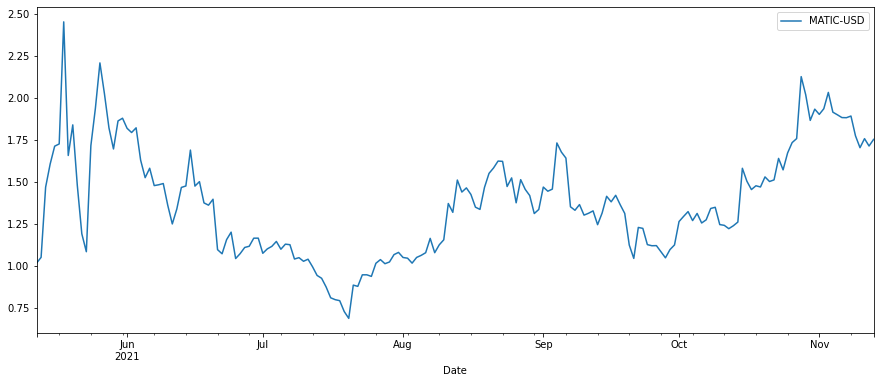

In [8]:
#Plot the closing prices of MATIC-USD.
data.plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

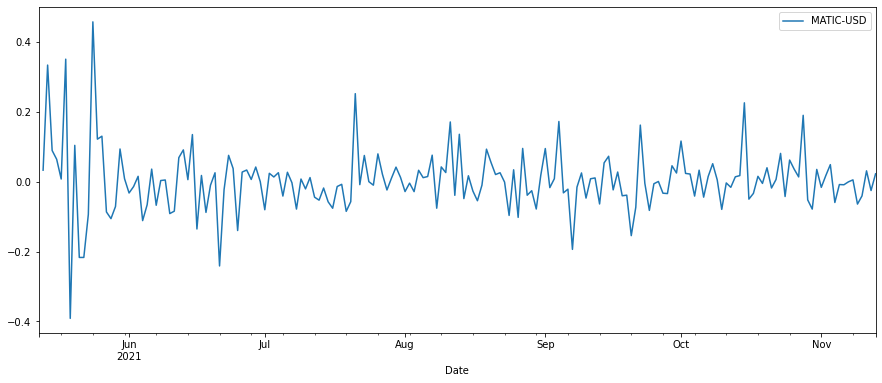

In [9]:
#Plot the daily log returns of MATIC-USD.
log_returns.plot(figsize = (15, 6))

In [10]:
# Calculating the average daily mean of log returns of MATIC-USD. Note that we do not need to annualize this because
# we are estimating daily returns for the next 180 days. 
u = log_returns.mean()
u

MATIC-USD    0.002938
dtype: float64

In [11]:
# Calculating the variance of daily returns of MATIC-USD
var = log_returns.var()
var

MATIC-USD    0.008398
dtype: float64

In [12]:
# Calculating the Drift
drift = u - (0.5 * var)
drift

MATIC-USD   -0.001261
dtype: float64

In [13]:
# Calculating the standard deviation of daily returns of MATIC-USD
stdev = log_returns.std()
stdev

MATIC-USD    0.091643
dtype: float64

### Note:
We need to convert drift and stdev from Pandas Series to numpy arrays for further calculations.

In [14]:
type(drift)

pandas.core.series.Series

In [15]:
type(stdev)

pandas.core.series.Series

In [16]:
np.array(drift)

array([-0.00126101])

In [17]:
drift.values

array([-0.00126101])

In [18]:
stdev.values

array([0.09164265])

In [19]:
# norm.ppf(confidence value) calculates the z-score.
norm.ppf(0.95)

1.6448536269514722

In [20]:
x = np.random.rand(10, 2)
x

array([[0.89830496, 0.58235514],
       [0.16275816, 0.54815819],
       [0.90081809, 0.02767583],
       [0.46985247, 0.73135853],
       [0.3685058 , 0.01442448],
       [0.58868693, 0.97557322],
       [0.76341503, 0.17960892],
       [0.3102711 , 0.72748945],
       [0.30055684, 0.54751711],
       [0.29496444, 0.79639637]])

In [21]:
norm.ppf(x)

array([[ 1.27195229,  0.20792219],
       [-0.98318514,  0.12100937],
       [ 1.28622711, -1.91610551],
       [-0.07564073,  0.61692689],
       [-0.33581337, -2.18554438],
       [ 0.22416857,  1.96986746],
       [ 0.71733092, -0.91685651],
       [-0.49508207,  0.60523764],
       [-0.52279965,  0.11939076],
       [-0.53893911,  0.82881824]])

In [22]:
# Using the poweful norm.ppf function, we can also create z-scores of random numbers and arrange them into a marix 
# with the dimensions of our choice.
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.40239752,  0.17751925],
       [-1.56299701,  0.27946225],
       [-0.19277863,  0.51494427],
       [-0.522028  ,  1.494776  ],
       [-1.32987399,  0.12523094],
       [-0.87658645,  0.52319358],
       [-0.97556364,  1.85534003],
       [-0.58278137, -0.52692872],
       [-1.56703193,  0.93448241],
       [-1.523178  ,  0.99411008]])

In [23]:
# We now create two variables, one that stores the number of forecast days and another that create the number of
# possible paths that MATIC-USD prices might take.
t_intervals = 180
iterations = 5

# daily returns can be forecast using the equation we had defined earlier.
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [24]:
# We now get 5 different series based on the simulation that we have just done.
daily_returns

array([[0.94557009, 0.8851866 , 1.00942481, 1.00580257, 1.01559157],
       [0.80745125, 1.02198713, 0.93418401, 1.21845945, 1.03609211],
       [0.86057456, 1.05448674, 1.02171647, 0.81796418, 0.93882504],
       [0.99331189, 1.19782582, 0.92641794, 1.16277774, 1.00715342],
       [0.95971806, 0.95301619, 1.0120853 , 0.93928075, 1.01210214],
       [0.89951529, 0.93060378, 0.78481887, 1.10508584, 0.97542399],
       [1.09658367, 0.973365  , 0.94776513, 1.14461882, 0.97039326],
       [1.00332559, 1.16094242, 1.02525568, 0.89876071, 1.10532603],
       [0.97135604, 1.19949166, 1.05645344, 0.92440186, 0.83949909],
       [0.95253376, 0.95262904, 1.02367389, 0.93287777, 1.12145204],
       [1.04956486, 0.9435751 , 1.17348208, 0.95288336, 0.92468948],
       [0.99827138, 1.08883643, 1.1561581 , 1.02074347, 0.92420783],
       [0.94073652, 1.06173263, 1.13596022, 0.94489092, 1.05733155],
       [0.9834764 , 1.08690996, 0.97806503, 1.13730336, 0.85572761],
       [0.94038448, 1.01030299, 1.

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [25]:
# Create a variable that stores the first price of our forecast. This price will be the latest price for the time period
# we have taken.
S0 = data.iloc[-1]
S0

MATIC-USD    1.754877
Name: 2021-11-13 00:00:00, dtype: float64

In [26]:
# Create a numpy array with the same dimensions as that of the daily_returns variable.
# This is achieved using the zeroes_like function in numpy.
price_list = np.zeros_like(daily_returns)

In [27]:
price_list

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0.

In [28]:
price_list[0]

array([0., 0., 0., 0., 0.])

In [29]:
# Populate the first column with the S0 variable since all 5 iterations will start from the same price.
price_list[0] = S0
price_list

array([[1.75487697, 1.75487697, 1.75487697, 1.75487697, 1.75487697],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.

In [30]:
# Now, using the forecasting equation we had defined earlier, we forecast the rows of each of the columns for the time interval.
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [31]:
price_list

array([[1.75487697, 1.75487697, 1.75487697, 1.75487697, 1.75487697],
       [1.4169776 , 1.79346168, 1.63937801, 2.13824643, 1.81821418],
       [1.21941487, 1.89118155, 1.67497951, 1.74900898, 1.706985  ],
       [1.21125929, 2.26530609, 1.55173107, 2.0337087 , 1.71919578],
       [1.16246741, 2.15887338, 1.57048421, 1.91022343, 1.74000173],
       [1.0456572 , 2.00905573, 1.23254564, 2.11096085, 1.69723943],
       [1.14665062, 1.95554454, 1.16816378, 2.41624553, 1.64698971],
       [1.15046391, 2.27027461, 1.19766656, 2.17162656, 1.82046059],
       [1.11751007, 2.72317547, 1.26527896, 2.00745563, 1.52827501],
       [1.06446607, 2.59417605, 1.29523303, 1.87271074, 1.71388713],
       [1.11722618, 2.44779993, 1.51993276, 1.7844749 , 1.5848134 ],
       [1.11529493, 2.66525374, 1.75728257, 1.82149111, 1.46469695],
       [1.04919866, 2.82978687, 1.9962031 , 1.72111041, 1.54867029],
       [1.03186213, 3.07572353, 1.95241644, 1.95742466, 1.32523993],
       [0.97034713, 3.10741268, 2.

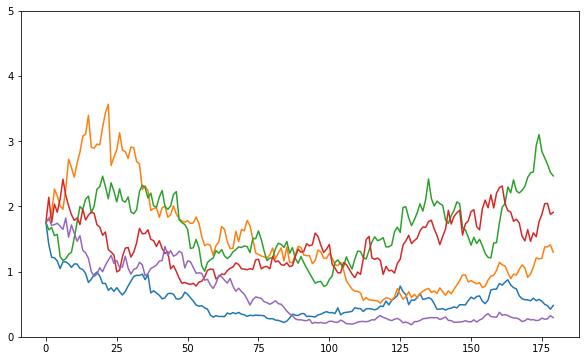

In [32]:
# Visualizing the five paths using matplotlib.pyplot
plt.figure(figsize=(10,6))
plt.ylim((0,5))
plt.plot(price_list)

<AxesSubplot:xlabel='Date'>

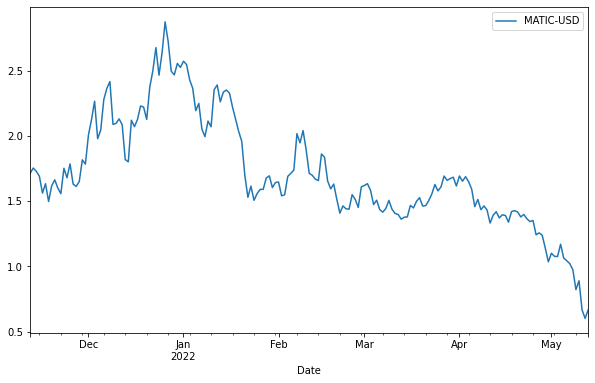

In [33]:
# Now, we can finally compare our simulated paths of MATIC-USD with the path actually taken by it in the next six months.
ticker2 = 'MATIC-USD'
data2 = pd.DataFrame()
data2[ticker2] = wb.DataReader(ticker2, data_source = 'yahoo', start = '2021-11-12', end = '2022-5-12')['Adj Close']
data2.plot(figsize=(10,6))